In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from dyn_fed.losses import HingeLoss
from dyn_fed.models.svm import SVM

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#Input data
x = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])


#output label
y = np.array([-1, -1, 1, 1, 1])[:, np.newaxis]

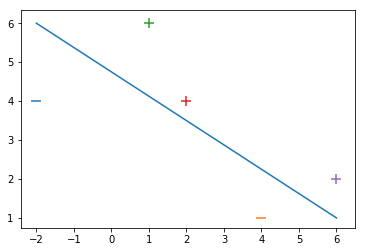

In [4]:
for val, inp in enumerate(x):
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)

plt.plot([-2,6],[6,1])

In [5]:
x.shape, y.shape

((5, 3), (5, 1))

In [6]:
n_samples, n_features = x.shape
n_classes = y.shape[1]

In [7]:
loss_func = HingeLoss()

In [9]:
svm = SVM(optimizer=None, n_inputs=x.shape[0], n_outputs=1)

In [10]:
svm.layers[0].W.data

array([[-0.00810889],
       [ 0.00137287],
       [-0.00335919],
       [-0.00198934],
       [-0.00402022]], dtype=float32)

In [65]:
w = np.zeros((n_features, n_classes))
b = np.zeros((n_classes, 1))

In [66]:
np.dot(x, w) + b

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [80]:
np.dot(x.T, -y)

array([[-7],
       [-7],
       [ 1]])

In [103]:
# Init hyperparams
alpha = 0.01
epochs = 10000
reg_param = 1 / epochs
losses = []

# Init weights
# w = np.zeros((n_features, n_classes))
w = np.random.randn(n_features, n_classes)
print(w.shape)

for epoch in tqdm(range(epochs), leave=False):
    epoch_losses = []
    for i in np.arange(x.shape[0]):
        # y_pred = svm.forward(x)
        y_pred = np.dot(x[i], w) + b
        # print(f"y_pred.shape={y_pred.shape}")
        loss_val = (y[i] * y_pred).flatten()[0]
        epoch_losses.append(loss_val)
        # print(f"loss_val={loss_val}")
        # loss = np.where(loss_val < 1, 1 - loss_val, 0)
        # print(f"{x.shape}, y.shape={y.shape}")
        d_w = -y[i] * x[i] if loss_val < 1 else 0
        # print(f"d_w.shape={d_w.shape}")
        # loss = loss_func.loss(y, y_pred, reg_param=reg_param)
        # d_w = loss_func.grad(y, y_pred, x=x, w=w, reg_param=reg_param)
        w = w - alpha * d_w
    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)
    if epoch % 100 == 0:
        print(f"Epoch={epoch}, loss={epoch_loss}")

(3, 1)


Epoch=0, loss=-0.42205994692654547
Epoch=100, loss=-0.05805994692654552
Epoch=200, loss=-0.006059946926545523
Epoch=300, loss=0.04594005307345448
Epoch=400, loss=-0.05805994692654579
Epoch=500, loss=-0.00605994692654579
Epoch=600, loss=0.045940053073454126
Epoch=700, loss=-0.05805994692654608
Epoch=800, loss=-0.0060599469265461
Epoch=900, loss=0.045940053073453856
Epoch=1000, loss=-0.05805994692654635
Epoch=1100, loss=-0.006059946926546367
Epoch=1200, loss=0.04594005307345354
Epoch=1300, loss=-0.05805994692654663
Epoch=1400, loss=-0.006059946926546633
Epoch=1500, loss=0.04594005307345337
Epoch=1600, loss=-0.0580599469265469
Epoch=1700, loss=-0.0060599469265469
Epoch=1800, loss=0.045940053073453016
Epoch=1900, loss=-0.05805994692654719
Epoch=2000, loss=-0.006059946926547255
Epoch=2100, loss=0.045940053073452704
Epoch=2200, loss=-0.05805994692654746
Epoch=2300, loss=-0.006059946926547477
Epoch=2400, loss=0.04594005307345243
Epoch=2500, loss=-0.05805994692654774
Epoch=2600, loss=-0.006059

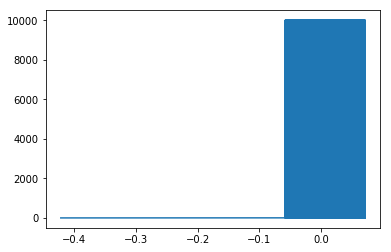

In [108]:
plt.plot(losses, np.arange(len(losses)))